In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt


In [4]:
#Load dataset
(train_image, train_label), (test_image, test_label) = tf.keras.datasets.cifar10.load_data()
print('Dataset: ',(train_image.shape, train_label.shape), (test_image.shape, test_label.shape))

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Dataset:  ((50000, 32, 32, 3), (50000, 1)) ((10000, 32, 32, 3), (10000, 1))


In [5]:
#Preprocess the dataset
train_image = train_image.astype('float32') / 255.0
test_image = test_image.astype('float32') / 255.0

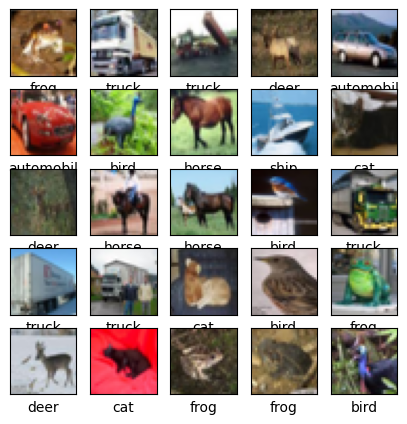

In [6]:
#Verify the dataset
class_names = ['airplane', 'automobil', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
#Ploat images
plt.figure(figsize=(5,5))
#plot first 25
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_image[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_label[i][0]])
plt.show()

In [8]:
#Define SimCNN using the code given

model_simcnn = models.Sequential()
model_simcnn.add(layers.Conv2D(32, (3, 3), activation = 'relu',
input_shape=(32, 32, 3)))
model_simcnn.add(layers.MaxPooling2D((2, 2)))
model_simcnn.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model_simcnn.add(layers.MaxPooling2D((2, 2)))
model_simcnn.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model_simcnn.add(layers.Flatten()) 
model_simcnn.add(layers.Dense(64, activation = 'relu'))
model_simcnn.add(layers.Dense(10))
model_simcnn.summary()

c:\Users\sharh\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


<bound method Model.summary of <Sequential name=sequential, built=True>>

In [9]:
#Compile and train model
model_simcnn.compile(optimizer = 'adam',
                loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
                metrics = ['accuracy'])
history = model_simcnn.fit(train_image, train_label, epochs = 10, validation_data = (test_image, test_label))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.3487 - loss: 1.7600 - val_accuracy: 0.5450 - val_loss: 1.2630
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5710 - loss: 1.2084 - val_accuracy: 0.6190 - val_loss: 1.0813
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6367 - loss: 1.0291 - val_accuracy: 0.6436 - val_loss: 1.0178
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6714 - loss: 0.9329 - val_accuracy: 0.6691 - val_loss: 0.9437
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7065 - loss: 0.8422 - val_accuracy: 0.6863 - val_loss: 0.9046
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7287 - loss: 0.7798 - val_accuracy: 0.7000 - val_loss: 0.8669
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7461 - loss: 0.7211 - val_accuracy: 0.6833 - val_loss: 0.9252
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7582 - loss: 0.6863 - 

313/313 - 0s - 1ms/step - accuracy: 0.7065 - loss: 0.8813
SimmCNN Test accuracy:  70.65%


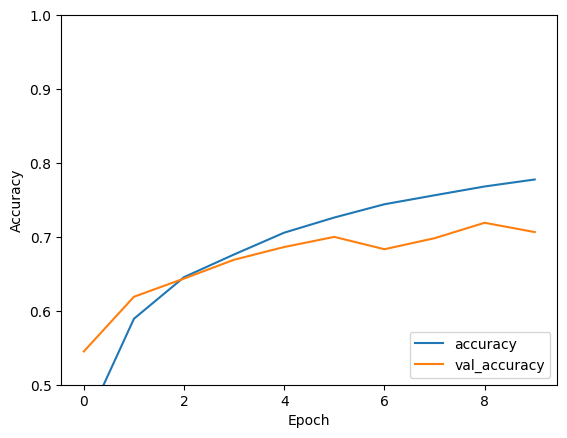

In [10]:
#Evaluate SimCMM
plt.plot(history.history['accuracy'], label = 'accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc = 'lower right')
test_loss, test_acc = model_simcnn.evaluate(test_image, test_label, verbose=2)
print(f'SimmCNN Test accuracy: {test_acc* 100: .2f}%')